In [ ]:
# We have to use this specific versions of tf and keras
# Because time series generator is not stable in latest version


#pip install tensorflow==2.4.0

#pip install keras==2.4.3

In [1]:
# To Prepare and Manipulate Data
import pandas as pd

# For Plotting Graph
import matplotlib as mpl
import matplotlib.pyplot as plt

# Seperating Train and Test Data
from sklearn.model_selection import train_test_split

# Specify particular input and output of our specified time series in problem
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# To scale data into matrix so that machine can get same data type of all columns
from sklearn.preprocessing import MinMaxScaler , StandardScaler

# ML & DL Framework
import tensorflow as tf


# Fixing size of graph
mpl.rcParams['figure.figsize']= (15,9)
mpl.rcParams['axes.grid']= False


In [2]:
#import file from computer folder

from google.colab import files
uploaded = files.upload()

Saving prediction_data.csv to prediction_data.csv


In [3]:
# READ DATASET FILE

df = pd.read_csv('prediction_data.csv')

In [4]:
df

,Date,Sentiment Score,Oc,Oo,Oh,Ol,Vol,Percentage Change
0,2019-04-02,0.8176,0.002795,0.002459,0.002863,0.002394,0.06020,25.50
1,2019-04-03,0.3400,0.003164,0.002777,0.003656,0.002771,0.08980,11.66
2,2019-04-03,0.0000,0.003164,0.002777,0.003656,0.002771,0.08980,11.66
3,2019-04-03,0.0000,0.003164,0.002777,0.003656,0.002771,0.08980,11.66
4,2020-04-25,0.0000,0.002124,0.002083,0.002144,0.002068,0.17312,1.98
5,2020-07-18,0.1511,0.003459,0.003053,0.003562,0.003053,8.33000,13.19
6,2020-11-18,0.0000,0.002908,0.002940,0.002975,0.002854,1.02000,-1.06
7,2020-12-20,0.0000,0.004643,0.003927,0.004643,0.003891,10.00000,18.16
8,2021-02-04,0.0721,0.052930,0.037000,0.052930,0.036789,48.78000,41.69
9,2021-02-04,0.0000,0.052930,0.037000,0.052930,0.036789,48.78000,41.69


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               53 non-null     object 
 1   Sentiment Score    53 non-null     float64
 2   Oc                 53 non-null     float64
 3   Oo                 53 non-null     float64
 4   Oh                 53 non-null     float64
 5   Ol                 53 non-null     float64
 6   Vol                53 non-null     float64
 7   Percentage Change  53 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.4+ KB


In [6]:
# As date's datatype was object we converted it into 'Date' datatype

df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               53 non-null     datetime64[ns]
 1   Sentiment Score    53 non-null     float64       
 2   Oc                 53 non-null     float64       
 3   Oo                 53 non-null     float64       
 4   Oh                 53 non-null     float64       
 5   Ol                 53 non-null     float64       
 6   Vol                53 non-null     float64       
 7   Percentage Change  53 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.4 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba84eb64d0>,
      dtype=object)

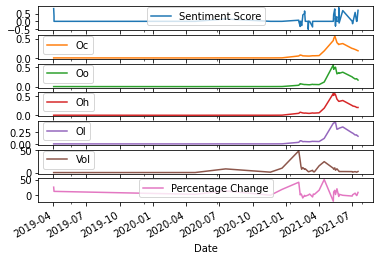

In [8]:
# Co-relation showing plots of Sentiment Scores , OHLC , Volume and Percentage Change

df.set_index('Date')[['Sentiment Score','Oc','Oo','Oh','Ol','Vol','Percentage Change']].plot(subplots=True)

In [9]:
# Dataframe as columns to be considered for ml algorithm

df_input = df[['Percentage Change','Sentiment Score','Oc','Oo','Oh','Ol','Vol']]

In [10]:
df_input

,Percentage Change,Sentiment Score,Oc,Oo,Oh,Ol,Vol
0,25.50,0.8176,0.002795,0.002459,0.002863,0.002394,0.06020
1,11.66,0.3400,0.003164,0.002777,0.003656,0.002771,0.08980
2,11.66,0.0000,0.003164,0.002777,0.003656,0.002771,0.08980
3,11.66,0.0000,0.003164,0.002777,0.003656,0.002771,0.08980
4,1.98,0.0000,0.002124,0.002083,0.002144,0.002068,0.17312
5,13.19,0.1511,0.003459,0.003053,0.003562,0.003053,8.33000
6,-1.06,0.0000,0.002908,0.002940,0.002975,0.002854,1.02000
7,18.16,0.0000,0.004643,0.003927,0.004643,0.003891,10.00000
8,41.69,0.0721,0.052930,0.037000,0.052930,0.036789,48.78000
9,41.69,0.0000,0.052930,0.037000,0.052930,0.036789,48.78000


In [11]:
df_input.describe()

,Percentage Change,Sentiment Score,Oc,Oo,Oh,Ol,Vol
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,6.823208,0.128121,0.176671,0.170557,0.186162,0.160956,8.936905
std,15.337657,0.318989,0.170857,0.168413,0.181812,0.156097,11.878330
min,-20.810000,-0.510600,0.002124,0.002083,0.002144,0.002068,0.060200
25%,-1.430000,0.000000,0.052930,0.050559,0.052930,0.049802,2.250000
50%,1.260000,0.000000,0.072600,0.070006,0.075675,0.070006,5.150000
75%,11.660000,0.296000,0.345850,0.333860,0.364280,0.319470,9.680000
max,50.630000,0.883400,0.560230,0.567000,0.567000,0.473270,48.780000


In [12]:
# Converting Data into Matrix and scaled it accordingly 
# It is compulsory as ML Algo's need same scaled datatype 
# for all input columns.

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [13]:
data_scaled

array([[6.48236282e-01, 9.52797704e-01, 1.20228057e-03, 6.65584502e-04,
        1.27289079e-03, 6.91847658e-04, 0.00000000e+00],
       [4.54507279e-01, 6.10186514e-01, 1.86344530e-03, 1.22849905e-03,
        2.67678842e-03, 1.49192915e-03, 6.07555860e-04],
       [4.54507279e-01, 3.66284075e-01, 1.86344530e-03, 1.22849905e-03,
        2.67678842e-03, 1.49192915e-03, 6.07555860e-04],
       [4.54507279e-01, 3.66284075e-01, 1.86344530e-03, 1.22849905e-03,
        2.67678842e-03, 1.49192915e-03, 6.07555860e-04],
       [3.19008959e-01, 3.66284075e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.31774350e-03],
       [4.75923852e-01, 4.74677188e-01, 2.39201872e-03, 1.71706640e-03,
        2.51037433e-03, 2.09039860e-03, 1.69742076e-01],
       [2.76455767e-01, 3.66284075e-01, 1.40475107e-03, 1.51703702e-03,
        1.47117141e-03, 1.66807441e-03, 1.97004093e-02],
       [5.45492721e-01, 3.66284075e-01, 4.51347952e-03, 3.26419633e-03,
        4.42413642e-03, 3

In [14]:
# Knowing features [ Multiple Iterative Columns to be considered for predicting]

features = data_scaled

# Main Dependent Variable to be predicted as target

target = data_scaled[:,0]

In [15]:
# Testing what test and train size should be kept for making algo more accurate

TimeseriesGenerator(features,target,length=2,sampling_rate=1,batch_size=1)[0]

(array([[[6.48236282e-01, 9.52797704e-01, 1.20228057e-03, 6.65584502e-04,
          1.27289079e-03, 6.91847658e-04, 0.00000000e+00],
         [4.54507279e-01, 6.10186514e-01, 1.86344530e-03, 1.22849905e-03,
          2.67678842e-03, 1.49192915e-03, 6.07555860e-04]]]),
 array([0.45450728]))

In [16]:
# Here All Independent Columns are as features to X [indpen var]
# And target as Dependent Variable is assigned to Y [dpen var]

# Test size is data will be divided into train(80%) and test(20%)

# random_state is if code fails to divide at which row you want to split test and train data
# auto shuffle is kept off as we need datawise sequential data


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=32, shuffle=False)

In [17]:
# 42 rows as training data to machine

x_train.shape

(42, 7)

In [18]:
# 11 rows will be predicting to continue future expectations and predictions

x_test.shape

(11, 7)

In [19]:
# Making Data into Time Series Generator for ML algo to underatand in what timestamp I have to train 

win_length = 2
batch_size = 1
num_features = 7  # independent coloumns
train_generator = TimeseriesGenerator(x_train, y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [20]:
# testing assigned variables work properly or not

train_generator[0]

(array([[[6.48236282e-01, 9.52797704e-01, 1.20228057e-03, 6.65584502e-04,
          1.27289079e-03, 6.91847658e-04, 0.00000000e+00],
         [4.54507279e-01, 6.10186514e-01, 1.86344530e-03, 1.22849905e-03,
          2.67678842e-03, 1.49192915e-03, 6.07555860e-04]]]),
 array([0.45450728]))

In [21]:
# Multiiterative LSTM STACKED MODEL 

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(55, input_shape = (win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.LSTM(55, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(25, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))



In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 55)             13860     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 2, 55)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 55)             24420     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2, 55)             0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 55)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                8100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0

In [23]:
# Compiling model with auto removing errors and optimizing prediction data

model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])


In [24]:
# RUNNING ML MODEL and epochs is how many time machine should go after data .. kind of time peroid

history = model.fit_generator(train_generator, epochs=200,
                             validation_data=test_generator,
                             shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
40/40 [==============================] - 5s 34ms/step - loss: 0.1589 - mean_absolute_error: 0.3243 - val_loss: 0.0057 - val_mean_absolute_error: 0.0572
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0825 - mean_absolute_error: 0.2153 - val_loss: 0.0101 - val_mean_absolute_error: 0.0909
Epoch 3/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0670 - mean_absolute_error: 0.1837 - val_loss: 0.0133 - val_mean_absolute_error: 0.1026
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0620 - mean_absolute_error: 0.1823 - val_loss: 0.0152 - val_mean_absolute_error: 0.1093
Epoch 5/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0620 - mean_absolute_error: 0.1894 - val_loss: 0.0100 - val_mean_absolute_error: 0.0914
Epoch 6/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0602 - mean_absolute_error: 0.1895 - val_loss: 0.0112 - val_mean_absolute_error: 0.0956
Epoch 7/200
40/40 [==

In [25]:
# Evaluation of testing

model.evaluate_generator(test_generator,verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.01730436645448208, 0.09788069128990173]

In [26]:
# Getting Prediction Data

predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [27]:
predictions.shape[0]

9

In [28]:
predictions

array([[0.2417697 ],
       [0.38975582],
       [0.23556855],
       [0.39944798],
       [0.45300674],
       [0.55680287],
       [0.21871324],
       [0.43302375],
       [0.40779048]], dtype=float32)

In [29]:
y_test

array([0.22032475, 0.31984882, 0.2743561 , 0.23838186, 0.23838186,
       0.29507279, 0.37164054, 0.26301792, 0.27603583, 0.27603583,
       0.4074748 ])

In [30]:
x_test

array([[0.22032475, 1.        , 0.61587942, 0.64118623, 0.64114748,
        0.70948765, 0.0749141 ],
       [0.31984882, 0.28866571, 0.62854727, 0.61121722, 0.64111207,
        0.72370661, 0.04782039],
       [0.2743561 , 0.86183644, 0.66239388, 0.6636497 , 0.68083901,
        0.78196188, 0.04802565],
       [0.23838186, 0.36628407, 0.43412183, 0.44577699, 0.44688558,
        0.50660226, 0.04494682],
       [0.23838186, 0.36628407, 0.43412183, 0.44577699, 0.44688558,
        0.50660226, 0.04494682],
       [0.29507279, 0.25645624, 0.43528649, 0.42788056, 0.43004943,
        0.50401314, 0.02093194],
       [0.37164054, 0.77654232, 0.38973958, 0.35070108, 0.40186525,
        0.41178093, 0.04576784],
       [0.26301792, 0.36628407, 0.36133996, 0.36395966, 0.36426275,
        0.41738363, 0.01833074],
       [0.27603583, 0.36628407, 0.35064307, 0.35025853, 0.3581727 ,
        0.39429374, 0.02442128],
       [0.27603583, 0.36628407, 0.35064307, 0.35025853, 0.3581727 ,
        0.39429374, 0.0

In [31]:
x_test[:,1:][win_length:]

array([[0.86183644, 0.66239388, 0.6636497 , 0.68083901, 0.78196188,
        0.04802565],
       [0.36628407, 0.43412183, 0.44577699, 0.44688558, 0.50660226,
        0.04494682],
       [0.36628407, 0.43412183, 0.44577699, 0.44688558, 0.50660226,
        0.04494682],
       [0.25645624, 0.43528649, 0.42788056, 0.43004943, 0.50401314,
        0.02093194],
       [0.77654232, 0.38973958, 0.35070108, 0.40186525, 0.41178093,
        0.04576784],
       [0.36628407, 0.36133996, 0.36395966, 0.36426275, 0.41738363,
        0.01833074],
       [0.36628407, 0.35064307, 0.35025853, 0.3581727 , 0.39429374,
        0.02442128],
       [0.36628407, 0.35064307, 0.35025853, 0.3581727 , 0.39429374,
        0.02442128],
       [0.87474892, 0.32989432, 0.30058752, 0.35879233, 0.35469289,
        0.05151499]])

In [32]:
# Data Preparing to be scaled properly

df_pred = pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [33]:
# converting scaled data into normal data

rev_tran = scaler.inverse_transform(df_pred)

In [34]:
df_final = df_input[predictions.shape[0]*-1:]

In [35]:
df_final.count()

Percentage Change    9
Sentiment Score      9
Oc                   9
Oo                   9
Oh                   9
Ol                   9
Vol                  9
dtype: int64

In [36]:
df_final['Doge_Prediction_Change']=rev_tran[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
# Final Data with prediction 

df_final

,Percentage Change,Sentiment Score,Oc,Oo,Oh,Ol,Vol,Doge_Prediction_Change
44,-1.21,0.6908,0.37181,0.37699,0.38672,0.37053,2.40000,-3.537973
45,-3.78,0.0000,0.24441,0.25391,0.25457,0.24078,2.25000,7.034155
46,-3.78,0.0000,0.24441,0.25391,0.25457,0.24078,2.25000,-3.980983
47,0.27,-0.1531,0.24506,0.24380,0.24506,0.23956,1.08000,7.726564
48,5.74,0.5719,0.21964,0.20020,0.22914,0.19610,2.29000,11.552802
49,-2.02,0.0000,0.20379,0.20769,0.20790,0.19874,0.95327,18.967997
50,-1.09,0.0000,0.19782,0.19995,0.20446,0.18786,1.25000,-5.185126
51,-1.09,0.0000,0.19782,0.19995,0.20446,0.18786,1.25000,10.125217
52,8.30,0.7088,0.18624,0.17189,0.20481,0.16920,2.57000,8.322552


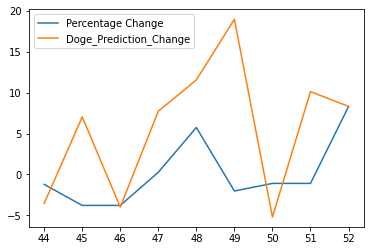

In [38]:
df_final[['Percentage Change','Doge_Prediction_Change']].plot()